In [1]:
#importing_libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

#setting_white_grid_background
sns.set_style('whitegrid')
#%matplotlib notebook
%matplotlib inline

In [6]:
#reading_prepared_dataset
df = pd.read_csv(r"C:\Users\visha\Downloads\ML4Eng_I_dataset_energy_measurement (1).txt")

In [5]:
#Display_Overview
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,224.000000,225.000000,225.000000,226.000000
mean,2.093750,1759.200000,1.644444,0.060063
std,1.447173,887.559998,43.726604,0.163246
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012769
50%,2.000000,2000.000000,10.000000,0.038630
75%,3.000000,2500.000000,40.000000,0.063981
max,15.000000,3000.000000,150.000000,0.900000


Text(0, 0.5, 'Total quantity')

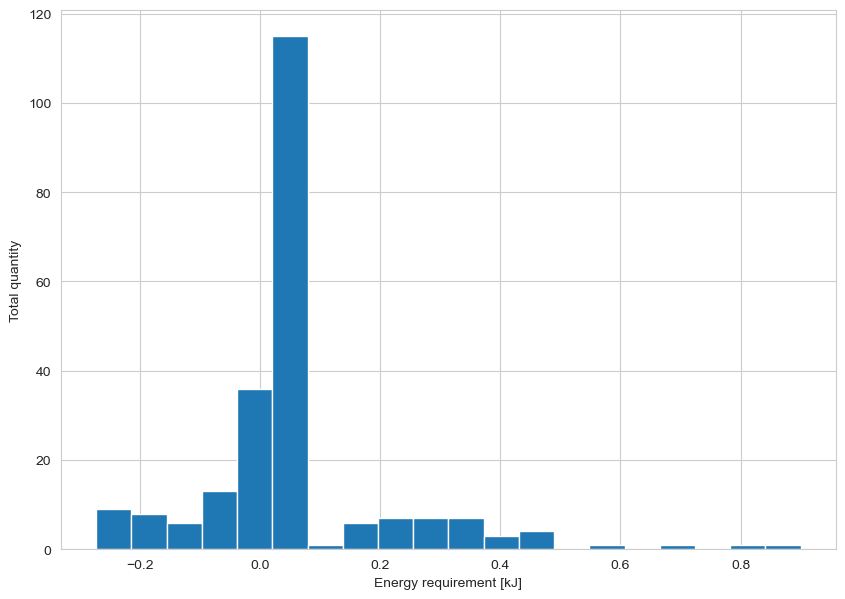

In [7]:
# plotting_target_variable_"Energy requirement"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Energy_Requirement,bins=20, range = (df.Energy_Requirement.min(), df.Energy_Requirement.max()))
plt.xlabel('Energy requirement [kJ]')
plt.ylabel('Total quantity')

Text(0, 0.5, 'Total quantity')

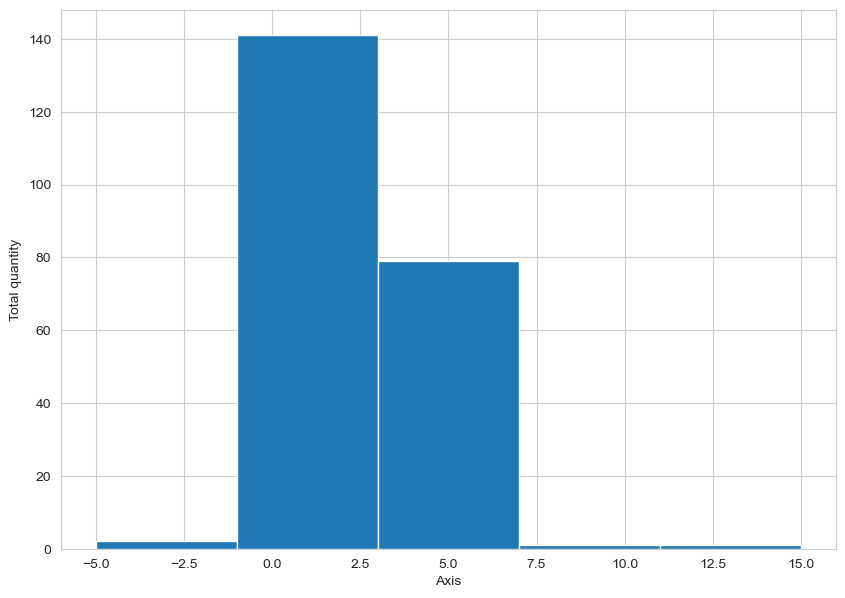

In [9]:
# plotting"Axis"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Axis,bins =5, range = (df.Axis.min(), df.Axis.max()))
plt.xlabel('Axis')
plt.ylabel('Total quantity')

Text(0, 0.5, 'Total quantity')

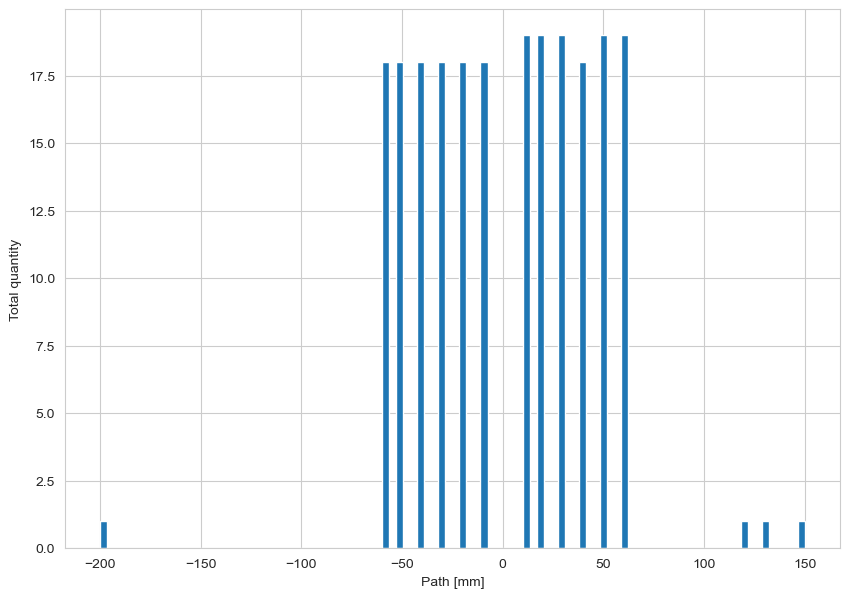

In [10]:
# plotting"Path"
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Path,bins = 100, range = (df.Path.min(), df.Path.max()))
plt.xlabel('Path [mm]')
plt.ylabel('Total quantity')

Text(0, 0.5, 'Total quantity')

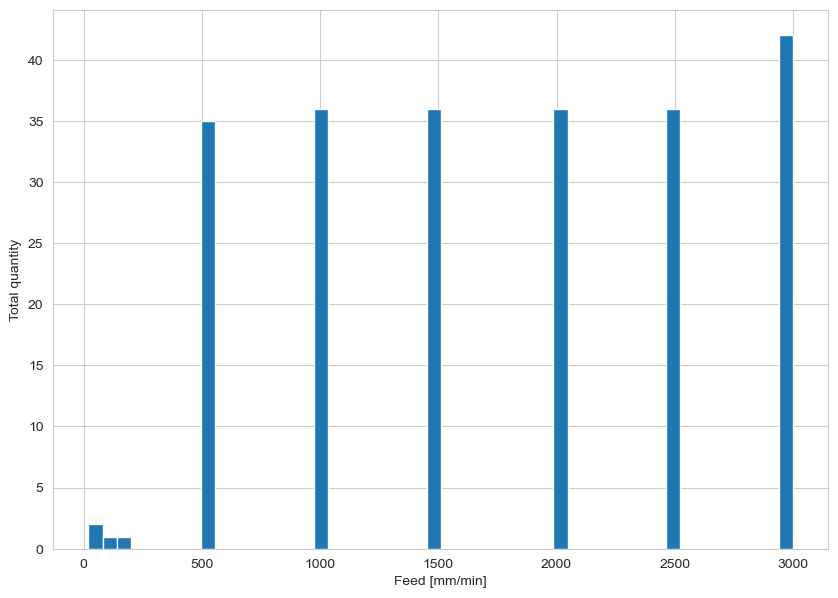

In [12]:
#Plotting'Feed'
%matplotlib inline
plt.figure(figsize=(10,7))
plt.hist(df.Feed,bins =50, range = (df.Feed.min(), df.Feed.max()))
plt.xlabel('Feed [mm/min]')
plt.ylabel('Total quantity')

In [13]:
#Visualize_first_10_instances
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
5,6.0,NaN,20.0,0.019462
6,NaN,500.0,30.0,0.029309
7,-2.0,500.0,NaN,0.038570
8,NaN,500.0,50.0,0.048310
9,1.0,500.0,60.0,0.057808


In [14]:
#Drop_all_rows_with_missing_values
df = df.dropna(subset=['Axis', 'Feed', 'Path'])

In [15]:
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
9,1.0,500.0,60.0,0.057808
10,1.0,1000.0,10.0,0.010401
11,1.0,1000.0,20.0,0.020560
12,1.0,1000.0,30.0,0.030982
13,1.0,1000.0,40.0,0.041358


In [16]:
#Analize_data_set
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,222.000000,222.000000,222.000000,222.000000
mean,2.094595,1776.216216,1.216216,0.060535
std,1.402992,881.272788,43.841117,0.164672
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012699
50%,2.000000,2000.000000,10.000000,0.039071
75%,3.000000,2500.000000,40.000000,0.065277
max,15.000000,3000.000000,150.000000,0.900000


In [18]:
#Defining_range_of_focus
df = df.loc[(df.Axis >= 1) & (df.Axis <= 3) & 
            (df.Path >= -60) & (df.Path <= 60) & 
            (df.Feed >= 500) & (df.Feed <= 3000)]

In [19]:
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,218.000000,218.000000,218.000000,218.000000
mean,2.045872,1807.339450,0.321101,0.047884
std,0.818961,858.431366,39.072043,0.135879
min,1.000000,500.000000,-60.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012676
50%,2.000000,2000.000000,10.000000,0.038600
75%,3.000000,2500.000000,37.500000,0.061995
max,3.000000,3000.000000,60.000000,0.450567


In [21]:
#Separate_features_to_train_model
X_multi = df.drop('Energy_Requirement', 1)

# energy requirement is our target variable
Y_target = df.Energy_Requirement

C:\Users\visha\AppData\Local\Temp\ipykernel_16716\1227568097.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_multi = df.drop('Energy_Requirement', 1)


In [22]:
#Dataset_divided_into_training_and_test_datasets
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, random_state=42)

In [23]:
#Shapes_of_the_datasets
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(163, 3) (163,) (55, 3) (55,)


In [24]:
#Importing_libraries
from sklearn.linear_model import LinearRegression

In [25]:
lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression()

In [26]:
#Prediction_of_traning_data
pred_train = lreg.predict(X_train)
#Prediction_of_unseen_data
pred_test = lreg.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#Error for_training_and_test_datasets

#Training_data
MSE_linear_Train_Data = mean_squared_error(Y_train, pred_train)
MAE_linear_Train_Data = mean_absolute_error(Y_train, pred_train)

print("The Mean Square Error on the training data is:", MSE_linear_Train_Data)
print("The Mean Absolute Error on the training data is:", MAE_linear_Train_Data)


#Test_data
MSE_linear_Test_Data = mean_squared_error(Y_test, pred_test)
MAE_linear_Test_Data = mean_absolute_error(Y_test, pred_test)


The Mean Square Error on the training data is: 0.01167892485881179
The Mean Absolute Error on the training data is: 0.09121547964727232


In [28]:
print("\n""The Mean Square Error on the test data is:", MSE_linear_Test_Data)
print("The Mean Absolute Error on the test data is:", MAE_linear_Test_Data)


The Mean Square Error on the test data is: 0.013044389500115312
The Mean Absolute Error on the test data is: 0.0905114994661013


Text(0, 0.5, 'Residual Value')

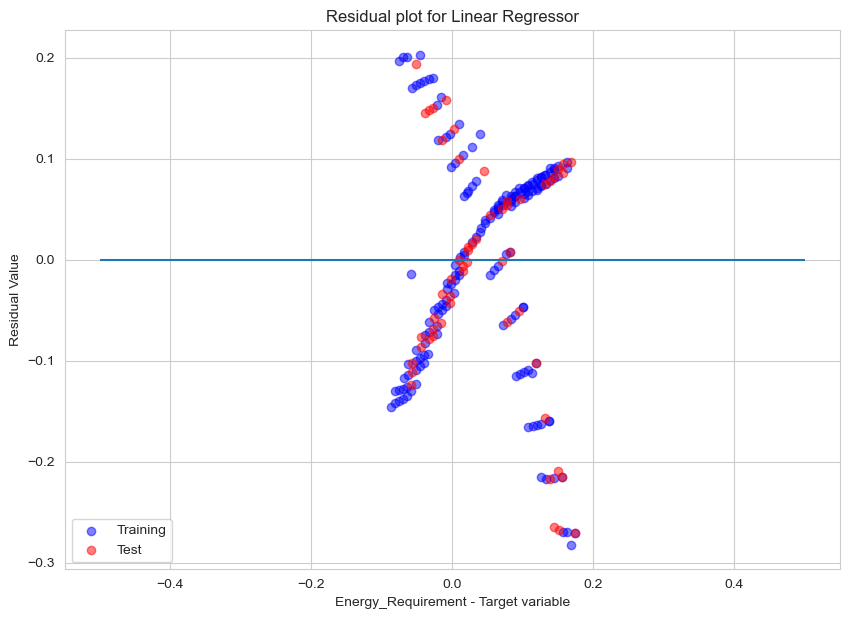

In [29]:
#Data points to be scattered around the horizontal line
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(pred_train, (pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(pred_test, (pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for Linear Regressor')
plt.xlabel("Energy_Requirement - Target variable")
plt.ylabel("Residual Value")

In [30]:
#RF
#Import_Random_Forest_Regressor
from sklearn.ensemble import RandomForestRegressor
#Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [31]:
#Train the model on training data
rf.fit(X_train, Y_train)
#Use the forest's predict method on the test data
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#Calulate the errors for the training and test datasets. 


#Training_data
MSE_rf_Train_Data = mean_squared_error(Y_train, rf_pred_train)
MAE_rf_Train_Data = mean_absolute_error(Y_train, rf_pred_train)

print("Mean Square Error on the training data is:", MSE_rf_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_rf_Train_Data)

#Test_data / unseen data
MSE_rf_Test_Data = mean_squared_error(Y_test, rf_pred_test)
MAE_rf_Test_Data = mean_absolute_error(Y_test, rf_pred_test)

print("\n""Mean Square Error on the test data is:", MSE_rf_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_rf_Test_Data)

Mean Square Error on the training data is: 6.31350011685033e-05
Mean Absolute Error on the training data is: 0.0026605765337424903

Mean Square Error on the test data is: 0.00017383678946808628
Mean Absolute Error on the test data is: 0.005907323690909195


Text(0, 0.5, 'Residual value')

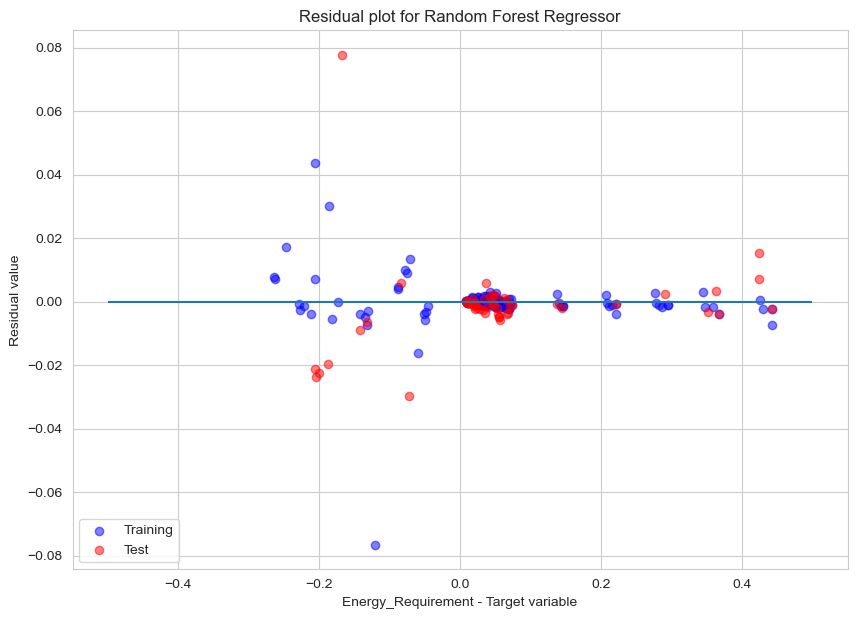

In [33]:
#Data points to be scattered around the horizontal line
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(rf_pred_train, (rf_pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(rf_pred_test, (rf_pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')

plt.title('Residual plot for Random Forest Regressor')
plt.xlabel("Energy_Requirement - Target variable")
plt.ylabel("Residual value")

In [34]:
#Import SVR from Sklearn
from sklearn.svm import SVR

In [35]:
#Initialize_model_and_train_it
svr_regressor = SVR(kernel='rbf')

svr_regressor.fit(X_train, Y_train)

SVR()

In [36]:
#Predict the values for the training and test dataset
svr_pred_train = svr_regressor.predict(X_train)
svr_pred_test = svr_regressor.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


#Error for the training and test datasets

#Training_data
MSE_svr_Train_Data = mean_squared_error(Y_train, svr_pred_train)
MAE_svr_Train_Data = mean_absolute_error(Y_train, svr_pred_train)


print("Mean Square Error on the training data is:", MSE_svr_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_svr_Train_Data)

#Test_data /unseen_data
MSE_svr_Test_Data = mean_squared_error(Y_test, svr_pred_test)
MAE_svr_Test_Data = mean_absolute_error(Y_test, svr_pred_test)


print("\n""Mean Square Error on the test data is:", MSE_svr_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_svr_Test_Data)

Mean Square Error on the training data is: 0.01359525397198958
Mean Absolute Error on the training data is: 0.08173011271299453

Mean Square Error on the test data is: 0.017131732482285424
Mean Absolute Error on the test data is: 0.09284924821367482


Text(0, 0.5, 'Residual value')

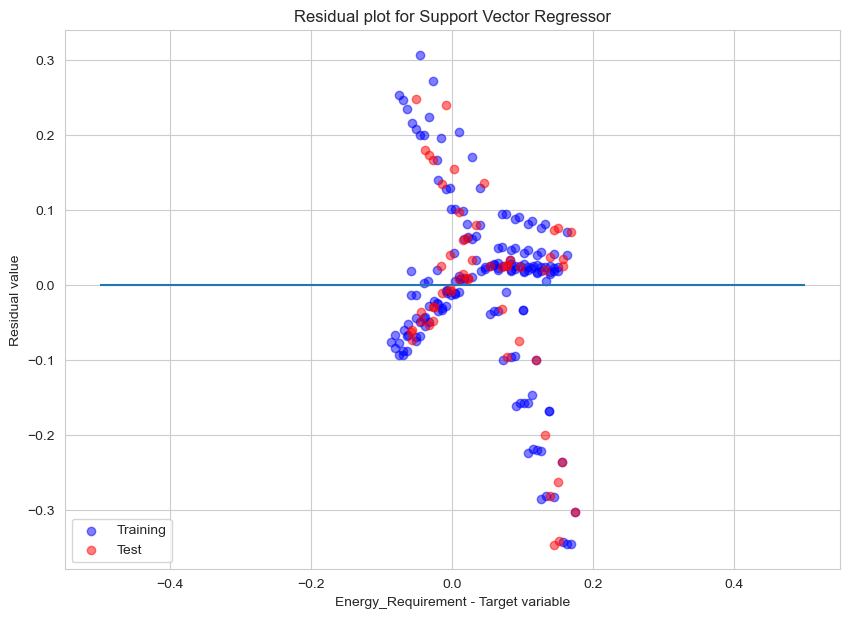

In [38]:
#Visualize_the_residual_plot
%matplotlib inline
plt.figure(figsize=(10,7))
train = plt.scatter(pred_train, (svr_pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(pred_test, (svr_pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for Support Vector Regressor')
plt.xlabel("Energy_Requirement - Target variable")
plt.ylabel("Residual value")

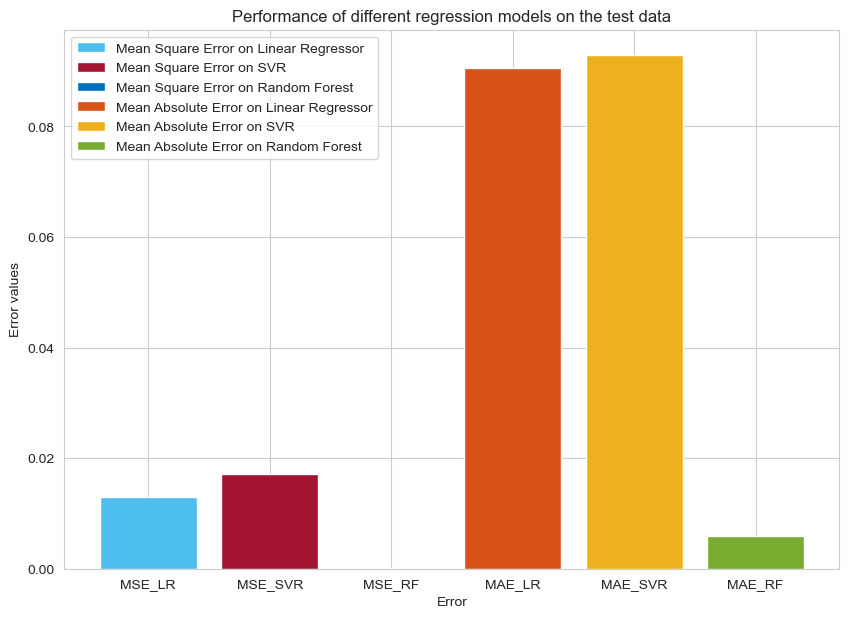

In [39]:
#Visualisation_of_results
%matplotlib inline 
plt.figure(figsize=(10,7))
plt.bar(['MSE_LR'],[MSE_linear_Test_Data], color=['#4DBEEE'], label="Mean Square Error on Linear Regressor")
plt.bar(['MSE_SVR'],[MSE_svr_Test_Data], color=['#A2142F'], label="Mean Square Error on SVR")
plt.bar(['MSE_RF'],[MSE_rf_Test_Data], color=['#0072BD'], label="Mean Square Error on Random Forest")

plt.bar(['MAE_LR'],[MAE_linear_Test_Data], color=['#D95319'], label="Mean Absolute Error on Linear Regressor")
plt.bar(['MAE_SVR'],[MAE_svr_Test_Data], color=['#EDB120'], label="Mean Absolute Error on SVR")
plt.bar(['MAE_RF'],[MAE_rf_Test_Data], color=['#77AC30'], label="Mean Absolute Error on Random Forest")

plt.xlabel('Error')
plt.ylabel('Error values')
plt.title('Performance of different regression models on the test data')
plt.legend(loc="upper left")
plt.show()

In [40]:
#Deployment_the_best_model_for_production_settings.
print("Predicted Energy Requirement for setting 1 is", rf.predict([[2, 800, 60]]),"kJ.")
print("Predicted Energy Requirement for setting 2 is", rf.predict([[3, 2000, 40]]),"kJ.")
print("Predicted Energy Requirement for setting 3 is", rf.predict([[1, 1200, -20]]),"kJ.")

#You can also save the data points within a variable first.
set = [[2, 800, 60],[3, 2000, 40],[1, 1200, -20]]
print("Predicted Energy Requirement for all settings is", sum(rf.predict(set)),"kJ.")

C:\Users\visha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\visha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted Energy Requirement for setting 1 is [0.05394835] kJ.
Predicted Energy Requirement for setting 2 is [0.28709159] kJ.
Predicted Energy Requirement for setting 3 is [0.02084422] kJ.
Predicted Energy Requirement for all settings is 0.3618841639999991 kJ.
